<a href="https://colab.research.google.com/github/rohit2000123sahu/Civil-Runrest-Prediction/blob/main/tweets_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install xgboost
!pip install tabulate
!pip install vaderSentiment

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 125 kB 4.5 MB/s 


In [ ]:
import warnings
import textblob

import numpy as np
import pandas as pd
import keras.utils as U
import keras.layers as L
import keras.models as M
import keras.optimizers as opt
import matplotlib.pyplot as plt

from tabulate import tabulate
from sklearn.ensemble import *
from collections import Counter
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import RidgeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.exceptions import UndefinedMetricWarning
from sklearn.metrics import precision_score, recall_score, f1_score
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [ ]:
from utils import *
from doc_utils import *
from nlp_utils import *

In [ ]:
plt.rcParams['figure.figsize'] = [20, 8]

# Read tweets csv
df = pd.read_json("./drive/MyDrive/TweetsConsolidated.json")

# Drop all-null rows if any
df.dropna(how='all', inplace=True)

In [ ]:
lead_days = 2
days_window = 5

start_date = pd.to_datetime("18-apr-2022")
end_date = pd.to_datetime("29-apr-2022")


labels = process_acled_csv("2022-04-18-2022-04-26-South_Asia-India.csv",
                           top_locations=-1,
                           start=start_date,
                           end=end_date,
                           lead_days=lead_days,
                           days_window = days_window)

Data from 2022-04-18 to 2022-04-29  & Number of days - 12


In [ ]:
df

,created_at,id,id_str,full_text,truncated,display_text_range,entities,source,in_reply_to_status_id,in_reply_to_status_id_str,...,userfriends_count,userlisted_count,userfavourites_count,userverified,userstatuses_count,userfollowing,userfollow_request_sent,usercontributors_enabled,extracted_location,finallocation
0,2022-04-26 02:41:56+00:00,1518782400415039488,1518782400415039488,@KannadaNaduu Did you protest same when Bangal...,False,"[14, 137]","{'hashtags': [], 'symbols': [], 'user_mentions...","<a href=""http://twitter.com/download/android"" ...",1.518455e+18,1.518455e+18,...,272,1,14060,False,3616,NaN,NaN,False,bangalore,Bengaluru
1,2022-04-26 01:43:23+00:00,1518767666726465537,1518767666726465536,Farmers of Punjab in past had protested agains...,False,"[0, 281]","{'hashtags': [], 'symbols': [], 'user_mentions...","<a href=""https://mobile.twitter.com"" rel=""nofo...",NaN,NaN,...,958,2,15144,False,2980,NaN,NaN,False,punjab,Bathinda
2,2022-04-26 01:43:23+00:00,1518767666726465537,1518767666726465536,Farmers of Punjab in past had protested agains...,False,"[0, 281]","{'hashtags': [], 'symbols': [], 'user_mentions...","<a href=""https://mobile.twitter.com"" rel=""nofo...",NaN,NaN,...,958,2,15144,False,2980,NaN,NaN,False,punjab,Chandigarh
3,2022-04-26 01:43:23+00:00,1518767666726465537,1518767666726465536,Farmers of Punjab in past had protested agains...,False,"[0, 281]","{'hashtags': [], 'symbols': [], 'user_mentions...","<a href=""https://mobile.twitter.com"" rel=""nofo...",NaN,NaN,...,958,2,15144,False,2980,NaN,NaN,False,punjab,Ludhiana
4,2022-04-26 01:43:23+00:00,1518767666726465537,1518767666726465536,Farmers of Punjab in past had protested agains...,False,"[0, 281]","{'hashtags': [], 'symbols': [], 'user_mentions...","<a href=""https://mobile.twitter.com"" rel=""nofo...",NaN,NaN,...,958,2,15144,False,2980,NaN,NaN,False,punjab,Amritsar
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93792,2022-04-18 10:15:00+00:00,1515997314397077511,1515997314397077504,রাজনৈতিক ক্ষমতা বলে ত্রিপুরায় নারী নির্যাতন অ...,False,"[0, 272]",{'hashtags': [{'text': 'TripuraDeservesBetter'...,"<a href=""https://mobile.twitter.com"" rel=""nofo...",NaN,NaN,...,0,0,7,False,556,NaN,NaN,False,"india,agartala",India
93793,2022-04-18 04:40:59+00:00,1515913258615832581,1515913258615832576,Not even one show is housefull today for #Beas...,False,"[0, 150]","{'hashtags': [{'text': 'Beast', 'indices': [41...","<a href=""http://twitter.com/download/android"" ...",NaN,NaN,...,118,0,1059,False,1464,NaN,NaN,False,chennai,Chennai
93794,2022-04-18 07:00:00+00:00,1515948240696401920,1515948240696401920,निकाय चुनाव को लेकर भाजपा तैयार : धनखड़\nhttps...,False,"[0, 72]","{'hashtags': [{'text': 'haryana', 'indices': [...","<a href=""https://about.twitter.com/products/tw...",NaN,NaN,...,388,12,123,False,26174,NaN,NaN,False,haryana,Karnal
93795,2022-04-18 07:00:00+00:00,1515948240696401920,1515948240696401920,निकाय चुनाव को लेकर भाजपा तैयार : धनखड़\nhttps...,False,"[0, 72]","{'hashtags': [{'text': 'haryana', 'indices': [...","<a href=""https://about.twitter.com/products/tw...",NaN,NaN,...,388,12,123,False,26174,NaN,NaN,False,haryana,Gurgaon


In [ ]:
labels

{'Abohar': array([1., 1., 0., 0., 0.]),
 'Adilabad': array([1., 0., 0., 0., 0.]),
 'Agartala': array([1., 1., 1., 0., 0.]),
 'Agra': array([0., 0., 1., 1., 1.]),
 'Ahmedabad': array([1., 1., 0., 0., 0.]),
 'Ahmedgarh': array([0., 0., 0., 0., 1.]),
 'Ajnala': array([1., 0., 0., 0., 0.]),
 'Akhnoor': array([1., 1., 0., 0., 0.]),
 'Akkireddigudem': array([0., 0., 0., 0., 0.]),
 'Aligarh': array([1., 0., 0., 0., 0.]),
 'Alwar': array([0., 0., 0., 1., 1.]),
 'Ambala': array([1., 1., 1., 1., 1.]),
 'Amritsar': array([0., 0., 0., 0., 0.]),
 'Anantnag': array([0., 0., 1., 1., 1.]),
 'Arnia': array([1., 1., 1., 0., 0.]),
 'Arong Nongmaikhong': array([0., 1., 1., 1., 1.]),
 'Asifabad': array([1., 0., 0., 0., 0.]),
 'Awantipora': array([0., 0., 0., 0., 1.]),
 'Badanuagaon': array([1., 1., 1., 1., 0.]),
 'Bafliaz': array([0., 0., 1., 1., 1.]),
 'Baramulla': array([0., 1., 1., 1., 1.]),
 'Bari Brahmana': array([0., 0., 0., 0., 0.]),
 'Barnala': array([1., 1., 1., 1., 0.]),
 'Barpeta': array([0., 0.

In [ ]:
clean = False
if not clean:
    df = clean_df(df)
    clean = True

Dropping 0 rows!


In [ ]:
df.dropna(subset=['id'], inplace=True)
df = get_tweet_sentiment(df)

In [ ]:
df

,created_at,id,id_str,full_text,truncated,display_text_range,entities,source,in_reply_to_status_id,in_reply_to_status_id_str,...,userstatuses_count,userfollowing,userfollow_request_sent,usercontributors_enabled,extracted_location,finallocation,neg,neu,pos,compound
41756,2022-04-18 03:14:34+00:00,1515891509215727616,1515891509215727616,@sanjukohli1987 @AAPPunjab only people from Pu...,False,"[27, 102]","{'hashtags': [], 'symbols': [], 'user_mentions...","<a href=""http://twitter.com/download/android"" ...",1.515869e+18,1.515869e+18,...,4834,NaN,NaN,False,punjab,Sangrur,0.000,0.722,0.278,0.6124
41755,2022-04-18 03:14:34+00:00,1515891509215727616,1515891509215727616,@sanjukohli1987 @AAPPunjab only people from Pu...,False,"[27, 102]","{'hashtags': [], 'symbols': [], 'user_mentions...","<a href=""http://twitter.com/download/android"" ...",1.515869e+18,1.515869e+18,...,4834,NaN,NaN,False,punjab,Patiala,0.000,0.722,0.278,0.6124
41754,2022-04-18 03:14:34+00:00,1515891509215727616,1515891509215727616,@sanjukohli1987 @AAPPunjab only people from Pu...,False,"[27, 102]","{'hashtags': [], 'symbols': [], 'user_mentions...","<a href=""http://twitter.com/download/android"" ...",1.515869e+18,1.515869e+18,...,4834,NaN,NaN,False,punjab,Jalandhar,0.000,0.722,0.278,0.6124
41753,2022-04-18 03:14:34+00:00,1515891509215727616,1515891509215727616,@sanjukohli1987 @AAPPunjab only people from Pu...,False,"[27, 102]","{'hashtags': [], 'symbols': [], 'user_mentions...","<a href=""http://twitter.com/download/android"" ...",1.515869e+18,1.515869e+18,...,4834,NaN,NaN,False,punjab,Amritsar,0.000,0.722,0.278,0.6124
41752,2022-04-18 03:14:34+00:00,1515891509215727616,1515891509215727616,@sanjukohli1987 @AAPPunjab only people from Pu...,False,"[27, 102]","{'hashtags': [], 'symbols': [], 'user_mentions...","<a href=""http://twitter.com/download/android"" ...",1.515869e+18,1.515869e+18,...,4834,NaN,NaN,False,punjab,Ludhiana,0.000,0.722,0.278,0.6124
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84488,2022-04-26 03:27:55+00:00,1518793972931465217,1518793972931465216,@rightology @bgopu1973 Very very interesting t...,False,"[23, 215]","{'hashtags': [], 'symbols': [], 'user_mentions...","<a href=""http://twitter.com/download/iphone"" r...",1.518661e+18,1.518661e+18,...,1028,NaN,NaN,False,kerala,Thiruvananthapuram,0.229,0.624,0.146,-0.5757
84510,2022-04-26 03:30:10+00:00,1518794540592746496,1518794540592746496,@MNageswarRaoIPS @trspartyonline @TelanganaCMO...,False,"[47, 87]","{'hashtags': [], 'symbols': [], 'user_mentions...","<a href=""http://twitter.com/download/android"" ...",1.518489e+18,1.518489e+18,...,39738,NaN,NaN,False,telangana,Hyderabad,0.384,0.616,0.000,-0.6808
90780,2022-04-26 03:32:14+00:00,1518795058966720513,1518795058966720512,@MirrorNow My home in an hilly area hair pin b...,False,"[11, 288]","{'hashtags': [], 'symbols': [], 'user_mentions...","<a href=""http://twitter.com/download/android"" ...",1.518518e+18,1.518518e+18,...,950,NaN,NaN,False,coimbatore,Coimbatore,0.035,0.928,0.038,0.0387
90716,2022-04-26 03:32:48+00:00,1518795201925423110,1518795201925423104,@CNBCTV18News @_prashantnair My home in an hil...,False,"[29, 306]","{'hashtags': [], 'symbols': [], 'user_mentions...","<a href=""http://twitter.com/download/android"" ...",1.518791e+18,1.518791e+18,...,950,NaN,NaN,False,coimbatore,Coimbatore,0.034,0.929,0.037,0.0387


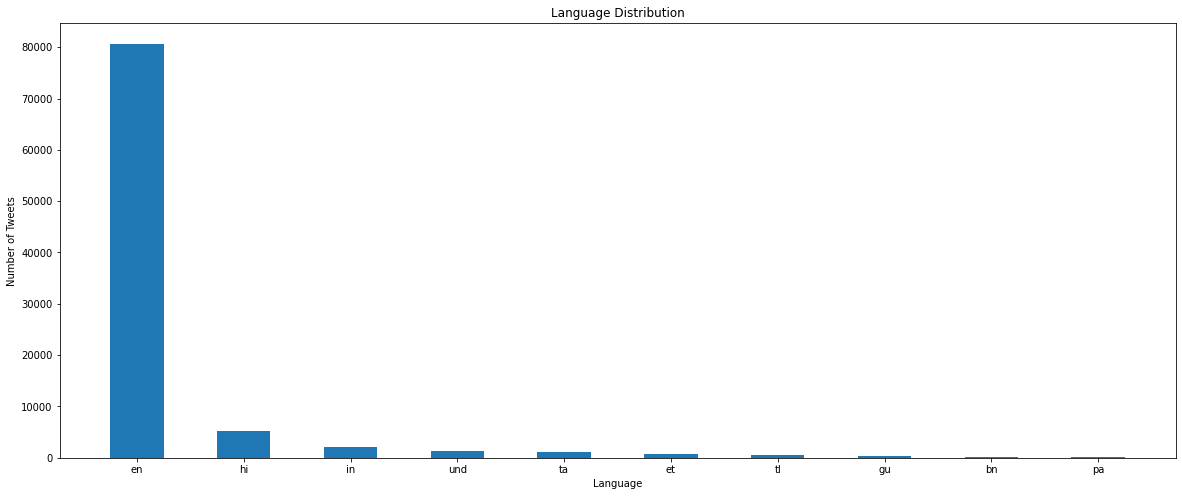

In [ ]:
plot_counter(df['lang'], num_elements=10, xlabel="Language", ylabel="Number of Tweets", title="Language Distribution")

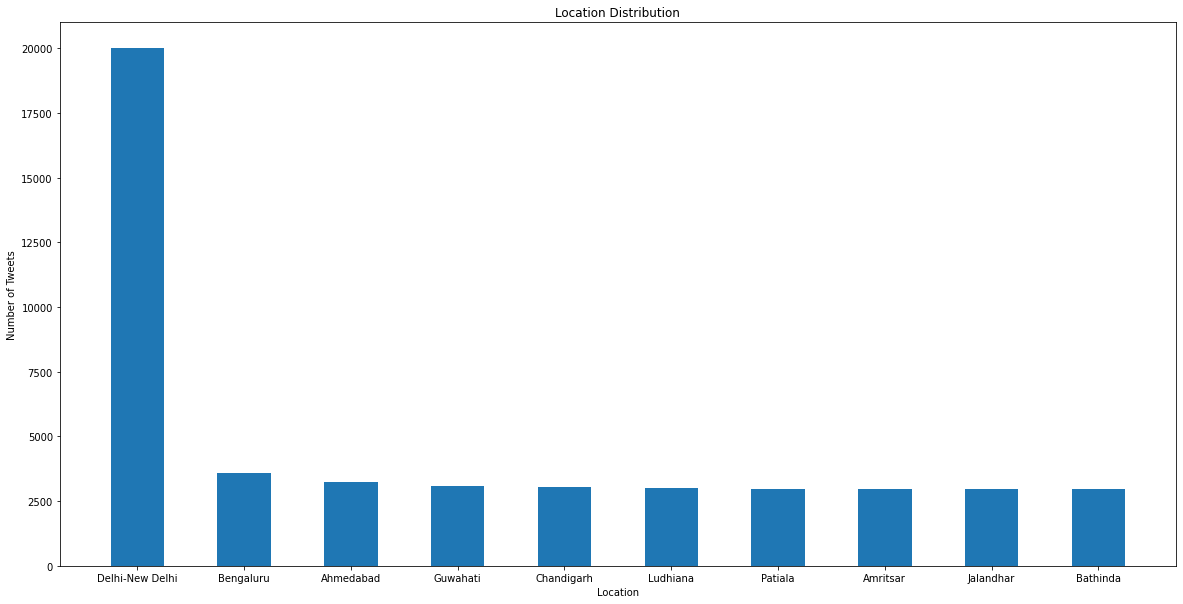

In [ ]:
plot_counter([x for x in df['finallocation'] if x != "India"], num_elements=10, xlabel="Location", ylabel="Number of Tweets", title="Location Distribution")

In [ ]:
df['created_at'] = pd.to_datetime(df['created_at'])
# Sort by time created
df.sort_values(by=['created_at'], inplace=True)

In [ ]:
print(start_date, end_date)
print(len(df))
df = df[df["finallocation"] != "India"]
print(len(df))
warnings.filterwarnings('ignore')
location_date_dict = interleave_location_and_date(df, "18-apr-2022", "26-apr-2022")
warnings.filterwarnings('default')

2022-04-18 00:00:00 2022-04-26 00:00:00
93797
66463


In [ ]:
location_date_dict

{'Agartala': {'2022-04-18 00:00:00':                      created_at                   id               id_str  \
  83935 2022-04-18 05:45:45+00:00  1515929558272589825  1515929558272589824   
  90589 2022-04-18 05:45:45+00:00  1515929558272589825  1515929558272589824   
  83744 2022-04-18 06:21:50+00:00  1515938638613278722  1515938638613278720   
  83381 2022-04-18 07:10:30+00:00  1515950884563603457  1515950884563603456   
  82978 2022-04-18 08:18:32+00:00  1515968004483395587  1515968004483395584   
  82435 2022-04-18 10:15:00+00:00  1515997314397077511  1515997314397077504   
  93791 2022-04-18 10:15:00+00:00  1515997314397077511  1515997314397077504   
  80803 2022-04-18 15:37:01+00:00  1516078353572368397  1516078353572368384   
  80791 2022-04-18 15:41:03+00:00  1516079367457234946  1516079367457234944   
  79774 2022-04-18 20:30:06+00:00  1516152112102752259  1516152112102752256   
  
                                                 full_text  truncated  \
  83935  @qriusmille

In [ ]:
location_features_dict = {}
for location in location_date_dict:
    if location.lower() == "india":
        continue
    location_features_dict[location] = get_features(location_date_dict[location])
    print(location, "done")

/content/nlp_utils.py:147: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  mean = docs.mean()
/content/nlp_utils.py:147: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  mean = docs.mean()


Sangrur done
Patiala done
Jalandhar done
Amritsar done
Ludhiana done
Chandigarh done
Bathinda done
Delhi-New Delhi done
Madurai done
Salem done
Coimbatore done
Chennai done
Tiruchirappalli done
Guwahati done
Ahmedabad done
Hyderabad done
Bengaluru done
Bhubaneswar done
Thiruvananthapuram done
Bangkok done
Kolkata done
Jaipur done
Patna done
Jammu done
Pulwama done
Shimla done
Gurgaon done
Karnal done
Lucknow done
Dehradun done
Puducherry done
Agartala done
Imphal done
Srinagar done
Ranchi done


In [ ]:
location_features_dict,labels

({'Agartala': [[10,
    0.0955,
    0.1363,
    0.7681000000000001,
    0.04790999999999997,
    7],
   [24,
    0.03854166666666666,
    0.064125,
    0.8973333333333331,
    -0.1700083333333334,
    12],
   [29,
    0.05996551724137931,
    0.02827586206896552,
    0.9117586206896554,
    0.06358275862068966,
    10],
   [18,
    0.09361111111111109,
    0.023,
    0.8833888888888889,
    0.21627777777777776,
    5],
   [20,
    0.06615000000000001,
    0.12284999999999995,
    0.8110999999999999,
    -0.12886499999999995,
    18],
   [3, 0.0, 0.105, 0.895, -0.23626666666666665, 2],
   [6,
    0.09933333333333334,
    0.09999999999999999,
    0.8006666666666667,
    0.07390000000000001,
    4],
   [15,
    0.09386666666666667,
    0.05593333333333334,
    0.8503333333333335,
    0.06783999999999998,
    7],
   [0, 0, 0, 0, 0, 0]],
  'Ahmedabad': [[622,
    0.05228938906752413,
    0.1611398713826367,
    0.7865627009646292,
    -0.3685512861736327,
    469],
   [428,
    0.0522383177

In [ ]:
labels

{'Abohar': array([1., 1., 0., 0., 0.]),
 'Adilabad': array([1., 0., 0., 0., 0.]),
 'Agartala': array([1., 1., 1., 0., 0.]),
 'Agra': array([0., 0., 0., 0., 0.]),
 'Ahmedabad': array([1., 1., 0., 0., 0.]),
 'Ajnala': array([1., 0., 0., 0., 0.]),
 'Akhnoor': array([1., 1., 0., 0., 0.]),
 'Akkireddigudem': array([0., 0., 0., 0., 0.]),
 'Aligarh': array([1., 0., 0., 0., 0.]),
 'Ambala': array([0., 0., 1., 1., 1.]),
 'Anantnag': array([0., 0., 0., 0., 0.]),
 'Arnia': array([0., 1., 1., 0., 0.]),
 'Arong Nongmaikhong': array([0., 0., 0., 0., 1.]),
 'Asifabad': array([1., 0., 0., 0., 0.]),
 'Badanuagaon': array([0., 0., 1., 1., 0.]),
 'Bafliaz': array([0., 0., 0., 0., 0.]),
 'Baramulla': array([0., 0., 0., 0., 1.]),
 'Barnala': array([0., 0., 1., 1., 0.]),
 'Barwal': array([0., 1., 1., 0., 0.]),
 'Basohli': array([0., 1., 1., 0., 0.]),
 'Bathinda': array([0., 0., 1., 1., 0.]),
 'Bhadarwah': array([0., 0., 0., 0., 0.]),
 'Bhagwanpur': array([1., 0., 0., 0., 0.]),
 'Bharatpur': array([0., 0., 0

In [ ]:
model = ExtraTreesClassifier(n_estimators=200, n_jobs=-1)
def make_predictions(location_features_dict, labels, model=None, permute=False, lead_days=2, days_window=2):
    """
    Input -
            location_features_dict - The dict mapping from location to features
            labels - Label dict generated from process_acled_csv(..)
            model - Specific sklearn model to evaluate/benchmark performance
            permute - Permute the data before train-test split
    Returns - None
    """
    # Table for presenting on tabulate
    result_table = []

    # Suppress warnings for divide-by-zero error
    warnings.filterwarnings("ignore")

    # Compute intersection for locations present on both dicts
    common_locations = set(location_features_dict.keys()) & set(labels.keys())

    # Sorted for clarity
    common_locations = sorted(list(common_locations))

    for common_location in common_locations:
        # Get data and labels
        X, y = location_features_dict[common_location], labels[common_location]
        X, y = np.array(X), np.array(y)

        #print(y)

        # Eliminate last days to match labels.shape
        X = X[:-(lead_days + days_window)]

        #print(X)

        # Permute randomly if specified
        if permute:
            p = np.random.permutation(len(X))
            X, y = X[p], y[p]

        # Split data into train & test - 75% & 25%
        split = int(0.75 * len(X))
        xtrain, ytrain = X[:split], y[:split]
        xtest, ytest = X[split:], y[split:]

        # Default model
        if model is None:
            model = xgboost.XGBClassifier(n_estimators=200, n_jobs=-1)

        # Fit the train data
        model.fit(xtrain, ytrain)

        # Make predictions
        ypred = model.predict(xtest)
        #print(ypred)

        # Compute metrics
        train_acc = model.score(xtrain, ytrain)
        test_acc = model.score(xtest, ytest)
        precision = precision_score(ytest, ypred, average='weighted', labels=np.unique(ypred))
        recall = recall_score(ytest, ypred, average='weighted', labels=np.unique(ypred))
        f1 = f1_score(ytest, ypred, average='weighted', labels=np.unique(ypred))

        print(train_acc,test_acc)

        # Add row to result_table
        result_row = [
                      common_location,
                      np.round(train_acc, 2), np.round(test_acc, 2),
                      np.round(precision, 2), np.round(recall, 2),
                      np.round(f1, 2), np.round(np.sum(y) / len(y), 2)
                     ]

        result_table.append(result_row)

    # Average stats
    # Turns out median is kind of useless
    result_table_copy = (np.array(result_table)[:, 1:]).astype(np.float32)
    averages = np.round(np.mean(result_table_copy, axis=0), 2)

    # Sort by test accuracy
    result_table = sorted(result_table, key=lambda x: -x[-2])


    # Add them to the existing result table
    result_table.append(["Average"] + averages.tolist())

    # Header for table
    header = ["Location", "Train Accuracy", "Test Accuracy",
              "Precision", "Recall", "F1 Score", "+'s in data"]

    # Print tabulated result
    print(tabulate(result_table,
                   tablefmt="pipe",
                   stralign="center",
                   headers=header))

    # Unsuppress warning
    warnings.filterwarnings("default")
    return

make_predictions(location_features_dict, labels,permute=True,model=model)

1.0 0.5
1.0 0.5
1.0 1.0
1.0 0.5
1.0 0.5
1.0 0.5
1.0 1.0
1.0 1.0
1.0 0.0
1.0 1.0
1.0 0.5
1.0 0.5
1.0 0.5
1.0 1.0
1.0 1.0
1.0 1.0
1.0 1.0
1.0 1.0
1.0 1.0
1.0 1.0
1.0 1.0
1.0 1.0
1.0 1.0
1.0 1.0
1.0 1.0
1.0 0.5
1.0 0.0
1.0 0.0
1.0 1.0
1.0 1.0
|      Location      |   Train Accuracy |   Test Accuracy |   Precision |   Recall |   F1 Score |   +'s in data |
|:------------------:|-----------------:|----------------:|------------:|---------:|-----------:|--------------:|
|      Amritsar      |                1 |            1    |        1    |     1    |       1    |          0    |
|     Chandigarh     |                1 |            1    |        1    |     1    |       1    |          1    |
|      Chennai       |                1 |            1    |        1    |     1    |       1    |          0.8  |
|      Dehradun      |                1 |            1    |        1    |     1    |       1    |          0.6  |
|       Imphal       |                1 |            1    |        1    |   

In [ ]:
def generate_LSTM_model(history):
    """ Generates a compiled LSTM model

    Input - Number of history points considered
    """
    model = M.Sequential()
    model.add(L.InputLayer(input_shape=(history, 6)))
    model.add(L.LSTM(10))
    model.add(L.Dense(20))
    model.add(L.Dense(2))
    model.add(L.Softmax())

    model.compile(loss="categorical_crossentropy", optimizer=opt.Adam(0.01))
    return model

def generate_CNN_model(history):
    """ Generate a compiled 1D CNN model

    Input - Number of history points considered
    """
    model = M.Sequential()
    model.add(L.InputLayer(input_shape=(history, 6)))
    model.add(L.Conv1D(32, kernel_size=3))
    model.add(L.Conv1D(16, kernel_size=1))
    model.add(L.Flatten())
    model.add(L.Dense(20))
    model.add(L.Dense(2))
    model.add(L.Softmax())

    model.compile(loss="categorical_crossentropy", optimizer=opt.Adam(0.01))
    return model

def make_deep_predictions(location_features_dict, labels, model=None, permute=False, lead_days=2, days_window=5, history=3):
    """
    Input -
            location_features_dict - The dict mapping from location to features
            labels - Label dict generated from process_acled_csv(..)
            model - Specific sklearn model to evaluate/benchmark performance
            permute - Permute the data before train-test split
            history - The number of data points for contextualization
    Returns - None
    """
    # Table for presenting on tabulate
    result_table = []

    # Compute intersection for locations present on both dicts
    common_locations = set(location_features_dict.keys()) & set(labels.keys())

    # Sorted for clarity
    common_locations = sorted(list(common_locations))

    for common_location in common_locations:
        # Get data and labels
        X, y = location_features_dict[common_location], labels[common_location]
        X, y = np.array(X), np.array(y)

        # Eliminate last days to match labels.shape
        X = X[:-(lead_days + days_window)]

        # Generate data for LSTM/CNN
        # Basically, use points from i to i + history
        # and predict for i + history + 1
        temp_X, temp_y = [], []
        for i in range(len(X) - history - 1):
            temp_X.append(X[i: i + history])
            temp_y.append(y[i + history + 1])

        X, y = np.array(temp_X), np.array(temp_y)

        # Permute randomly if specified
        if permute:
            p = np.random.permutation(len(X))
            X, y = X[p], y[p]

        # Split data into train & test - 75% & 25%
        split = int(0.75 * len(X))

        xtrain, ytrain = X[:split], y[:split]
        xtest, ytest = X[split:], y[split:]

        if isinstance(model, str):
            assert (history != 0)
            if model.lower() == "cnn":
                model = generate_CNN_model(history)
            elif model.lower() == "lstm":
                model = generate_LSTM_model(history)

        # Convert to one-hot encoding
        ytrain, ytest = U.to_categorical(ytrain, num_classes=2), U.to_categorical(ytest, num_classes=2)

        # Fit the train data
        model.fit(xtrain, ytrain, epochs=100, verbose=0)

        # Make predictions
        ypred = model.predict(xtest)
        ytrain_pred = model.predict(xtrain)

        # Uncategorize
        uncategorize = lambda x: np.argmax(x, axis=1)

        ytrain, ytest = uncategorize(ytrain), uncategorize(ytest)
        ytrain_pred, ypred = uncategorize(ytrain_pred), uncategorize(ypred)

        # Compute metrics
        train_acc = np.mean(ytrain_pred == ytrain)
        test_acc = np.mean(ytest == ypred)
        precision = precision_score(ytest, ypred, average='weighted', labels=np.unique(ypred))
        recall = recall_score(ytest, ypred, average='weighted', labels=np.unique(ypred))
        f1 = f1_score(ytest, ypred, average='weighted', labels=np.unique(ypred))

        # Add row to result_table
        result_row = [common_location,
                      np.round(train_acc, 2), np.round(test_acc, 2),
                      np.round(precision, 2), np.round(recall, 2),
                      np.round(f1, 2),
                      np.round(np.sum(y) / len(y), 2)]
        result_table.append(result_row)

    # Average stats
    # Turns out median is kind of useless
    result_table_copy = (np.array(result_table)[:, 1:]).astype(np.float32)
    result_table = sorted(result_table, key=lambda x: -x[2])
    averages = np.round(np.mean(result_table_copy, axis=0), 2)

    # Add them to the existing result table
    result_table.append(["Average"] + averages.tolist())

    # Header for table
    header = ["Location", "Train Accuracy", "Test Accuracy",
              "Precision", "Recall", "F1 Score", "+'s in data"]

    # Print tabulated result
    print(tabulate(result_table,
                   tablefmt="pipe",
                   stralign="center",
                   headers=header))

In [ ]:
make_deep_predictions(location_features_dict, labels, permute=False, model="lstm", history=7)

AttributeError: ignored